<center><font color='orange' size='20'>Outliers</font></center>

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import geopandas as gpd
import seaborn as sbn
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(
    '../Output/Datasets/dataset_final_csv.csv',
)

In [15]:
df

,metroscuadradostotales,precio,titulo,latitud,longitud,preciomt2
0,400,375500,"Venta de Casa Laguna Del Sol, 3 dormitorios, ...",-2.130761,-79.906738,938.750000
1,337,150000,En Venta Casa en Cdla. La Alborada Décima Etapa,-2.134000,-79.908997,445.103858
2,95,108000,"Venta de Suit amoblada Kennedy Point, planta baja",-2.199000,-79.907997,1136.842105
3,60,65000,Suite Kennedy Amoblada,-2.172635,-79.900551,1083.333333
4,132,138000,"Casa en Venta Urb. El Condado Vicolinci, Guaya...",-2.048000,-79.904999,1045.454545
...,...,...,...,...,...,...
4507,120,65500,CASA EN VENTA RECREO DURAN,-2.167000,-79.891998,545.833333
4508,140,125000,Lomas de Urdesa Vendo Departamento de Estreno,-2.160178,-79.895027,892.857143
4509,128,98000,"SE VENDE CASA EN SAN FELIPE, PRECIO DE OPORTUN...",-2.139000,-79.921997,765.625000
4510,18,1000,Vendo casa de 2 plantas,-2.171000,-79.921997,55.555556


In [16]:
q1 = df['preciomt2'].quantile(0.25)

In [17]:
q3 = df['preciomt2'].quantile(0.75)

In [18]:
q3

952.3809523809524

In [19]:
iqr = q3 - q1

In [20]:
df.loc[(df['preciomt2'] < q1 - 1.5*iqr) | (df['preciomt2'] > q3 + 1.5*iqr), :] # Outliers rango intercuartil

,metroscuadradostotales,precio,titulo,latitud,longitud,preciomt2
119,1000,2500000,Casa de venta en Cerro Santa Ana - Las Peñas –...,-2.161486,-79.917257,2.500000e+03
132,1,170000,Casa de venta en Río Centro Sur - Las Terrazas...,-2.161486,-79.917257,1.700000e+05
134,175,574700,"Venta de Penthouse en Edificio Santana Lofts, ...",-2.179000,-79.875999,3.284000e+03
184,50,110000,Sector Ciudad Colonvendo Suite Amoblada,-2.152000,-79.906998,2.200000e+03
185,73,160000,"Departamento en Venta, Puerto Santa Ana, Guaya...",-2.179000,-79.875999,2.191781e+03
...,...,...,...,...,...,...
4425,8,35000,Se Vende Departamento Sur de La Ciudad,-2.234000,-79.896000,4.375000e+03
4443,30,75000,Vendo Casa Mucho Lote 1 5taetapa,-2.159301,-79.919464,2.500000e+03
4455,20,56000,"Venta de Casa en el Sur de Guayaquil, entrando...",-2.171000,-79.921997,2.800000e+03
4463,120,280000,"Venta de Departamento en Edificio Quo, Av. Jua...",-2.156000,-79.889999,2.333333e+03


In [21]:
df.loc[np.abs((df['preciomt2'] - df['preciomt2'].mean()) / df['preciomt2'].std()) > 3]# Z-score

,metroscuadradostotales,precio,titulo,latitud,longitud,preciomt2
1657,15,120000000000,Se Alquila Mini Departamento 120 Dolares,-2.084572,-79.896957,8.000000e+09
4070,150,11111111111111,Vendo Hermosa Casa,-2.267572,-79.882056,7.407407e+10


In [22]:
df = df.loc[(df['preciomt2'] >= q1 - 1.5*iqr) & (df['preciomt2'] <= q3 + 1.5*iqr), :] # Dataset eliminando outliers

In [23]:
df[['metroscuadradostotales', 'precio']] = stats.zscore(df.loc[:, ['metroscuadradostotales', 'precio']]) # Standardization of precio and metroscuadradostotales

/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_20898/4144595226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['metroscuadradostotales', 'precio']] = stats.zscore(df.loc[:, ['metroscuadradostotales', 'precio']]) # Standardization of precio and metroscuadradostotales


In [24]:
df

,metroscuadradostotales,precio,titulo,latitud,longitud,preciomt2
0,-0.024995,1.828036,"Venta de Casa Laguna Del Sol, 3 dormitorios, ...",-2.130761,-79.906738,938.750000
1,-0.024995,0.134329,En Venta Casa en Cdla. La Alborada Décima Etapa,-2.134000,-79.908997,445.103858
2,-0.024995,-0.181129,"Venta de Suit amoblada Kennedy Point, planta baja",-2.199000,-79.907997,1136.842105
3,-0.024995,-0.504097,Suite Kennedy Amoblada,-2.172635,-79.900551,1083.333333
4,-0.024995,0.044198,"Casa en Venta Urb. El Condado Vicolinci, Guaya...",-2.048000,-79.904999,1045.454545
...,...,...,...,...,...,...
4507,-0.024995,-0.500342,CASA EN VENTA RECREO DURAN,-2.167000,-79.891998,545.833333
4508,-0.024995,-0.053443,Lomas de Urdesa Vendo Departamento de Estreno,-2.160178,-79.895027,892.857143
4509,-0.024995,-0.256237,"SE VENDE CASA EN SAN FELIPE, PRECIO DE OPORTUN...",-2.139000,-79.921997,765.625000
4510,-0.024995,-0.984794,Vendo casa de 2 plantas,-2.171000,-79.921997,55.555556


/var/folders/bq/_bqydjv50jg7scm3v5rwy0280000gn/T/ipykernel_20898/1626754788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df['preciomt2'], ax=axs, color='b')


<AxesSubplot:xlabel='preciomt2', ylabel='Density'>

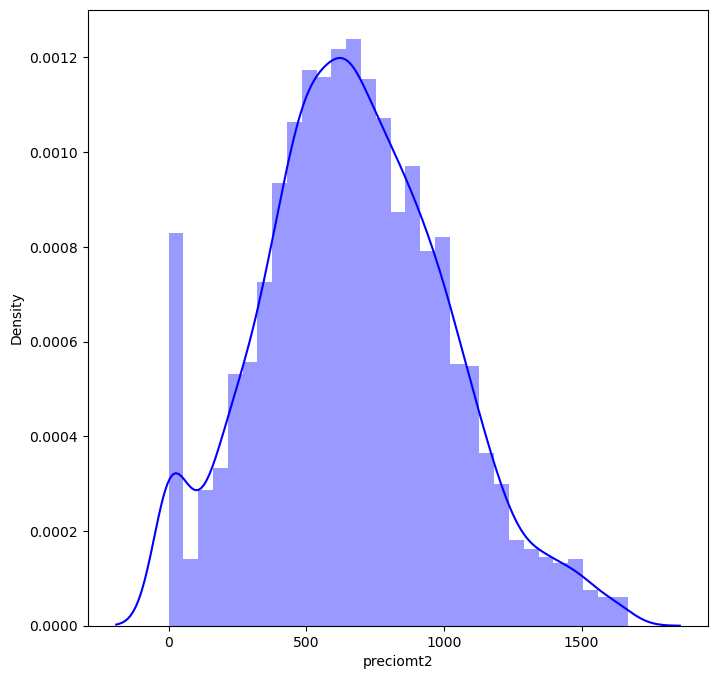

In [27]:
fig, axs = plt.subplots(figsize=(8,8))
sbn.distplot(df['preciomt2'], ax=axs, color='b')

<AxesSubplot:>

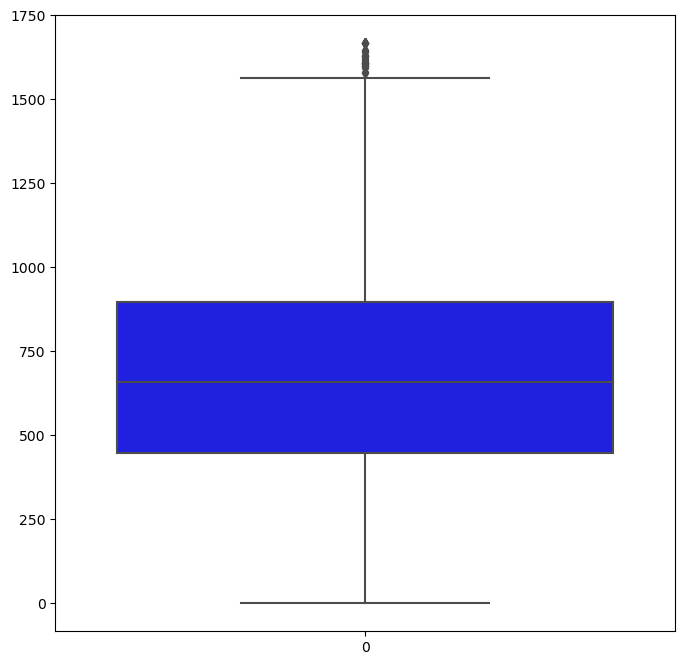

In [28]:
fig, axs = plt.subplots(figsize=(8,8))
sbn.boxplot(df['preciomt2'], ax=axs, color='b')